# TASK #1: PROJECT OVERVIEW 


**Inputs and outputs**

*   The dataset is consists of 43 different classes
*   Images are of size 32 x 32 pixels 
*   Colored images are consists of 3 RGB channels red, green and blue 


**Image input** ------> **Classifier** ----->  **Target Classes** 







# TASK #2: IMPORT LIBRARIES/DATASETS

In [1]:
!python3 --version

Python was not found but can be installed from the Microsoft Store: https://go.microsoft.com/fwlink?linkID=2082640


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import socket, pickle
import random

**Dividing data in to Trainning, validation and testing**
*   Data is divided 805 fro trainning and 20% for testing.
*   Sometimes, data is divided into 60%, 20%, 20% for
training, validation, and testing.
*   

1.    **Training set:** used for gradient calculation and weight update.
2.   **Validation set:**
*   Used for  cross-validation which is performed to assess training quality as training proceeds
*   cross-validation is used to overcome the over-fitting which occurs when algorithm focuses on traning set details at cost of losing generalization ability. 


3.  **Test set:** used for testing trained network.





In [3]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
x_train, y_train = train["features"], train["labels"]
x_validation, y_validation = valid["features"], valid["labels"]
x_test, y_test = test["features"], test["labels"]

In [5]:
x_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

# TASK #3: PERFORM IMAGES VISUALIZATION

30

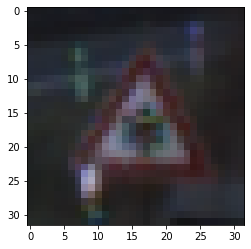

In [7]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

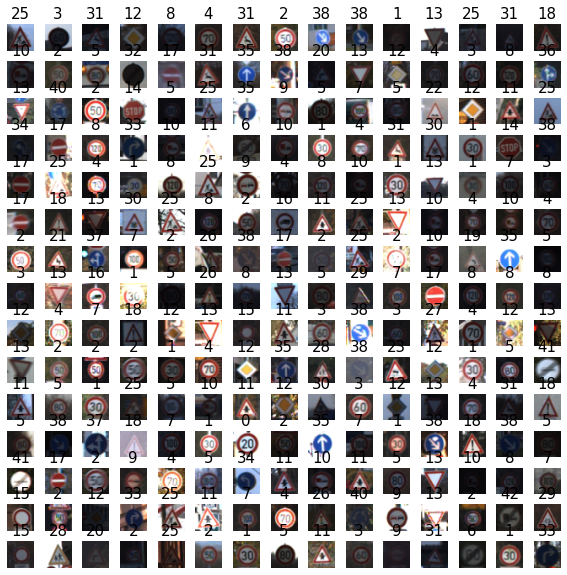

In [8]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid*L_grid):
  # Select a random number
  index = np.random.randint(0, n_training)
    
  # read and display an image with the selected index  
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index], fontsize= 15) 
  axes[i].axis('off')


plt.subplots_adjust(hspace= 0.4)
    

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [9]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)


In [10]:
x_train_gray = np.sum(x_train/3, axis= 3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis= 3, keepdims=True)
x_validation_gray = np.sum(x_validation/3, axis= 3, keepdims=True)

In [11]:
x_train_gray.shape

(34799, 32, 32, 1)

In [12]:
x_train_gray_norm = (x_train_gray-128)/128
x_test_gray_norm = (x_test_gray-128)/128
x_validation_gray_norm = (x_validation_gray-128)/128

In [ ]:
x_train_gray_norm

array([[[[-0.79947917],
         [-0.80729167],
         [-0.80989583],
         ...,
         [-0.78125   ],
         [-0.78385417],
         [-0.78125   ]],

        [[-0.79166667],
         [-0.8046875 ],
         [-0.8046875 ],
         ...,
         [-0.78125   ],
         [-0.78645833],
         [-0.78645833]],

        [[-0.79166667],
         [-0.8046875 ],
         [-0.80729167],
         ...,
         [-0.78125   ],
         [-0.78645833],
         [-0.78645833]],

        ...,

        [[-0.80729167],
         [-0.79947917],
         [-0.79427083],
         ...,
         [-0.80729167],
         [-0.80729167],
         [-0.80208333]],

        [[-0.80729167],
         [-0.79947917],
         [-0.79166667],
         ...,
         [-0.80729167],
         [-0.80729167],
         [-0.80989583]],

        [[-0.8046875 ],
         [-0.796875  ],
         [-0.79427083],
         ...,
         [-0.80989583],
         [-0.81510417],
         [-0.82291667]]],


       [[[-0.80208333],


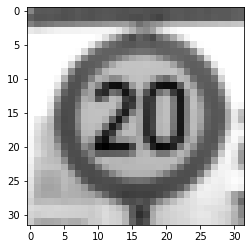

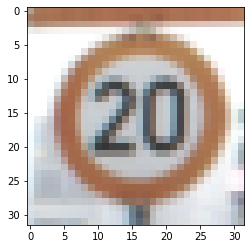

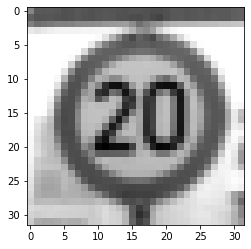

In [13]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

**Dropout**


*   Improve accuracy by adding dropout
*   Dropout refers to droping out units in neural network

*   Neurons develope co-dependency amongest each other during training 
*   Dropouts are regularization technique for reducing over-liftting in neural network  





# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [14]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5), activation = "relu", input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5), activation = "relu", input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [15]:
CNN.compile(optimizer= 'Adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history = CNN.fit(x_train_gray_norm,
                  y_train,
                  batch_size=500,
                  epochs = 6,
                  verbose= 1,
                  validation_data = (x_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/6
34799/34799 [==============================] - 13s 380us/sample - loss: 3.2237 - accuracy: 0.1565 - val_loss: 2.7636 - val_accuracy: 0.2746
Epoch 2/6
34799/34799 [==============================] - 14s 392us/sample - loss: 1.9147 - accuracy: 0.4708 - val_loss: 1.5321 - val_accuracy: 0.5476
Epoch 3/6
34799/34799 [==============================] - 13s 384us/sample - loss: 1.1679 - accuracy: 0.6536 - val_loss: 1.0914 - val_accuracy: 0.6819
Epoch 4/6
34799/34799 [==============================] - 14s 402us/sample - loss: 0.8487 - accuracy: 0.7488 - val_loss: 0.8856 - val_accuracy: 0.7417
Epoch 5/6
34799/34799 [==============================] - 14s 413us/sample - loss: 0.6836 - accuracy: 0.7978 - val_loss: 0.7273 - val_accuracy: 0.7868
Epoch 6/6
34799/34799 [==============================] - 14s 413us/sample - loss: 0.5741 - accuracy: 0.8317 - val_loss: 0.6866 - val_accuracy: 0.8009


# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

In [18]:
score = CNN.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 2s 152us/sample - loss: 0.9212 - accuracy: 0.7840
Test Accuracy: 0.7840063571929932


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

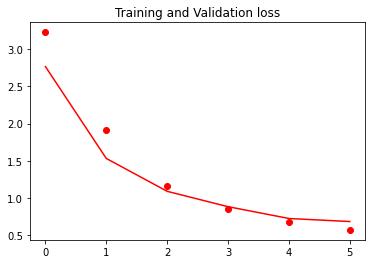

In [22]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label = "Validation loss")
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

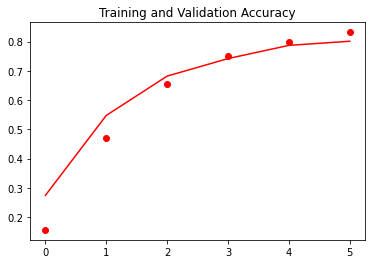

In [23]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label="Training accuracy")
plt.plot(epochs, val_accuracy, 'r', label="Validation accuracy")
plt.title('Training and Validation Accuracy')

<AxesSubplot:>

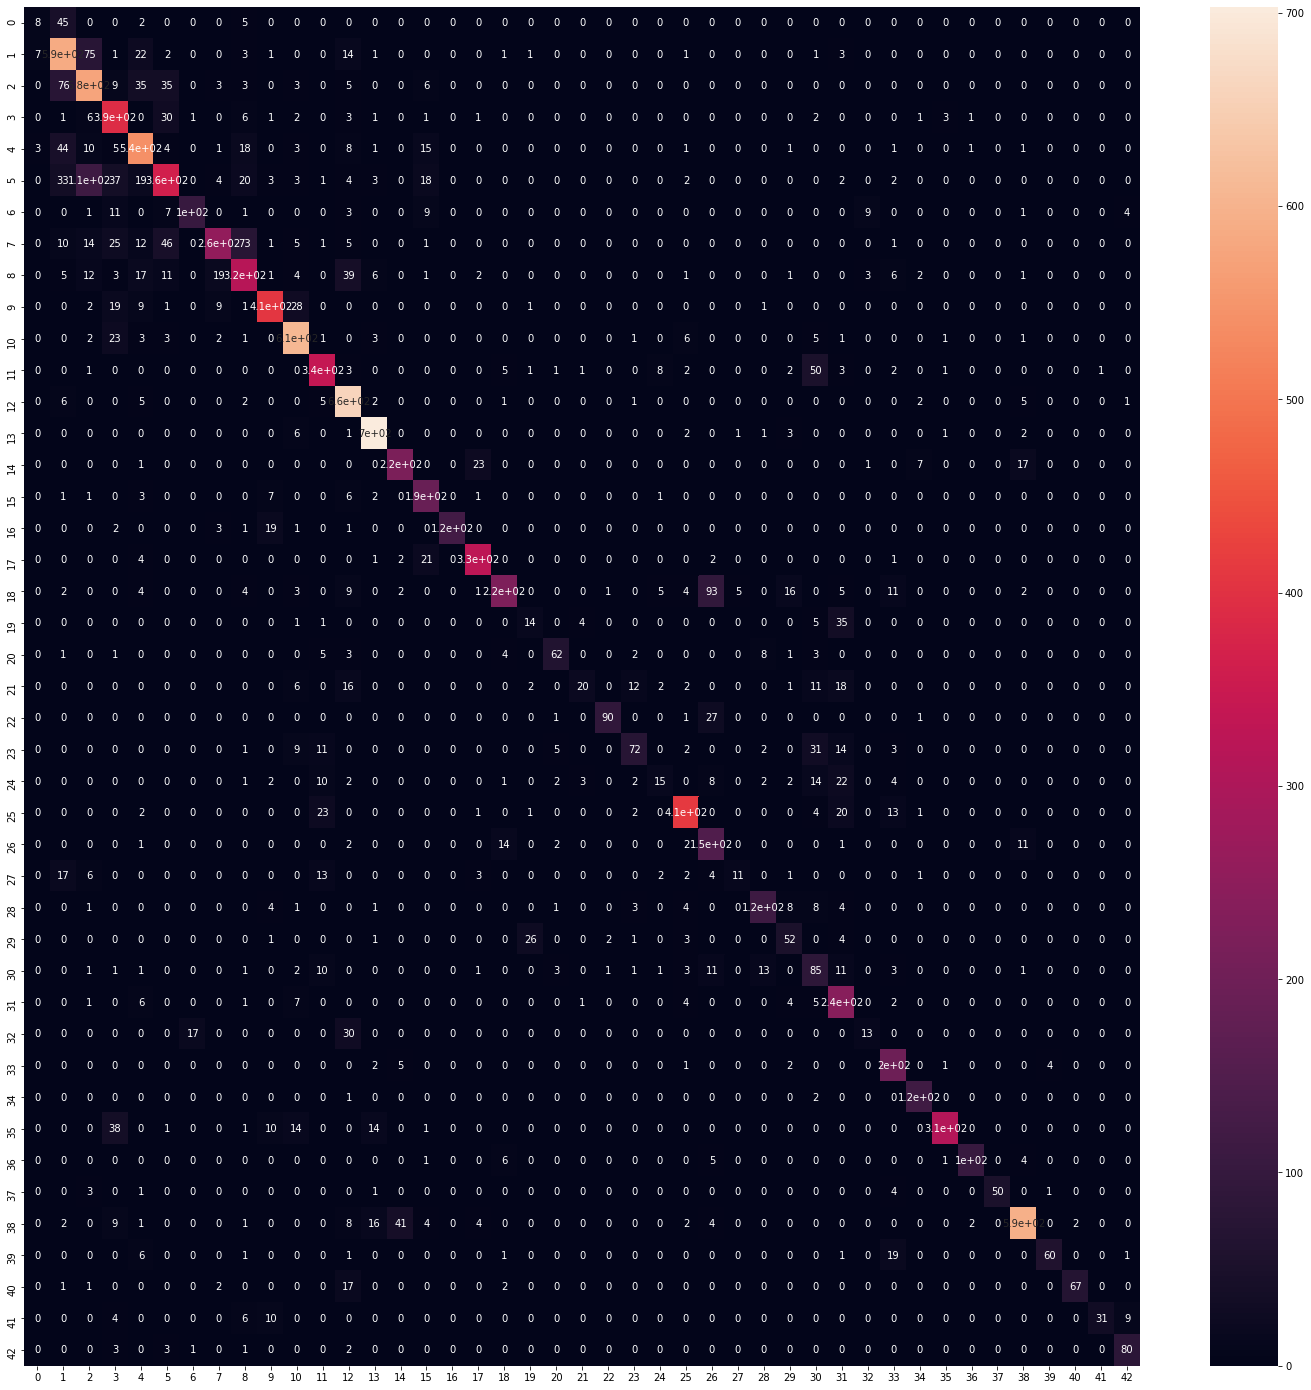

In [26]:
predicted_classes = CNN.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

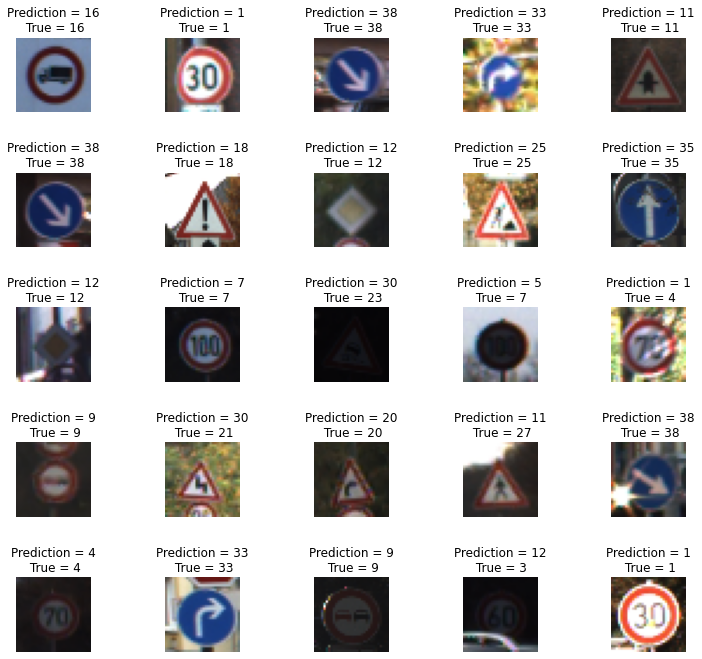

In [28]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# CONGRATULATIONS ON FINISHING THE PROJECT!

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }